In [1]:
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import math

In [2]:
net_df = pd.read_csv("../DATASETS/new_df_dies.csv", index_col="Dates", parse_dates=True)
net_df

,Agressions,New Years,agressions_lag_1,agressions_lag_2,agressions_lag_3,agressions_lag_4,agressions_week_avg,agressions_biweek_avg,agressions_1_month_avg,agressions_2_month_avg,...,"sin(1,freq=W-SUN)","cos(1,freq=W-SUN)","sin(2,freq=W-SUN)","cos(2,freq=W-SUN)","sin(3,freq=W-SUN)","cos(3,freq=W-SUN)",Poverty,HS Grads,BA Grads,Housing
Dates,,,,,,,,,,,,,,,,,,,,,
2001-01-01,100.0,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.196,0.71817,0.254851,0.437756
2001-01-02,5.0,0,100.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.781831,0.623490,0.974928,-0.222521,0.433884,-0.900969,0.196,0.71817,0.254851,0.437756
2001-01-03,11.0,0,5.0,100.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.974928,-0.222521,-0.433884,-0.900969,-0.781831,0.623490,0.196,0.71817,0.254851,0.437756
2001-01-04,3.0,0,11.0,5.0,100.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.433884,-0.900969,-0.781831,0.623490,0.974928,-0.222521,0.196,0.71817,0.254851,0.437756
2001-01-05,8.0,0,3.0,11.0,5.0,100.0,0.000000,0.000000,0.000000,0.000000,...,-0.433884,-0.900969,0.781831,0.623490,-0.974928,-0.222521,0.196,0.71817,0.254851,0.437756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-07,5.0,0,7.0,6.0,9.0,10.0,7.000000,6.928571,6.766667,6.800000,...,0.974928,-0.222521,-0.433884,-0.900969,-0.781831,0.623490,0.173,0.85900,0.411000,0.453000
2018-11-08,5.0,0,5.0,7.0,6.0,9.0,6.714286,6.857143,6.766667,6.800000,...,0.433884,-0.900969,-0.781831,0.623490,0.974928,-0.222521,0.173,0.85900,0.411000,0.453000
2018-11-09,4.0,0,5.0,5.0,7.0,6.0,6.571429,6.214286,6.733333,6.766667,...,-0.433884,-0.900969,0.781831,0.623490,-0.974928,-0.222521,0.173,0.85900,0.411000,0.453000


In [3]:
net_df.index = pd.to_datetime(net_df.index)
net_df_filtrado = net_df.loc['2018-07-01':'2018-08-31']

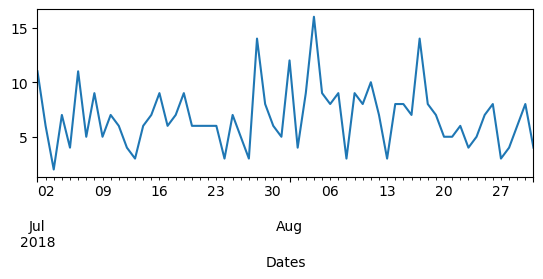

In [4]:
net_df_filtrado["Agressions"].plot(subplots=True, layout=(2,1));

In [5]:
train_data, test_data = net_df[0:int(len(net_df)*0.8)], net_df.loc['2018-07-01':'2018-08-31']


train_arima = train_data['Agressions']
test_arima = test_data['Agressions']


history = [x for x in train_arima]
y = test_arima
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5219
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -17021.059
Date:                Thu, 01 Feb 2024   AIC                          34046.117
Time:                        17:13:28   BIC                          34059.237
Sample:                             0   HQIC                         34050.706
                               - 5219                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4883      0.003   -192.736      0.000      -0.493      -0.483
sigma2        39.8877      0.138    289.929      0.000      39.618      40.157
Ljung-Box (L1) (Q):                  88.33   Jarque-

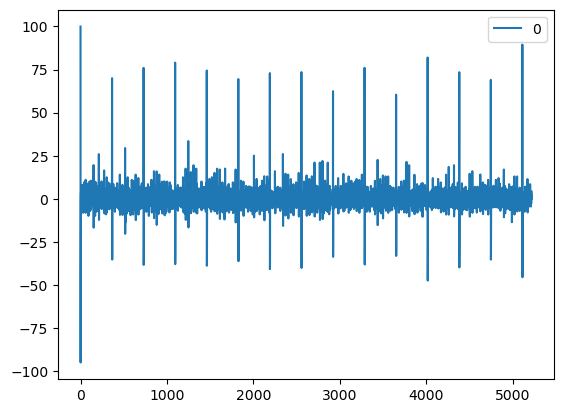

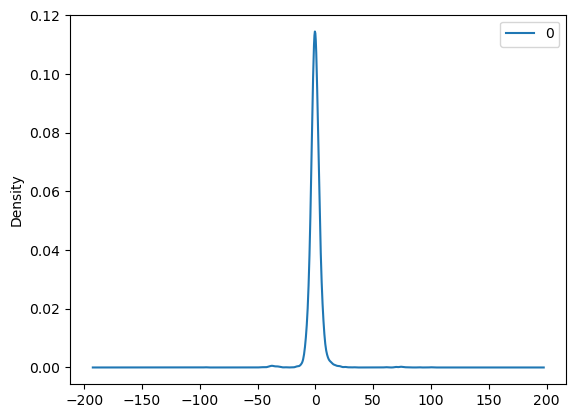

                 0
count  5219.000000
mean     -0.007743
std       6.497358
min     -94.997443
25%      -2.464866
50%      -0.070268
75%       2.023423
max     100.000000


In [6]:
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [7]:
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])

/var/folders/1d/_xylp1812vd2jg38vsf_30w00000gn/T/ipykernel_2416/151777919.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(y[0])


In [8]:
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

/var/folders/1d/_xylp1812vd2jg38vsf_30w00000gn/T/ipykernel_2416/1295931633.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = y[i]


In [9]:
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

MSE: 11.872575535024323
MAE: 2.726193711841964
RMSE: 3.4456603917136586


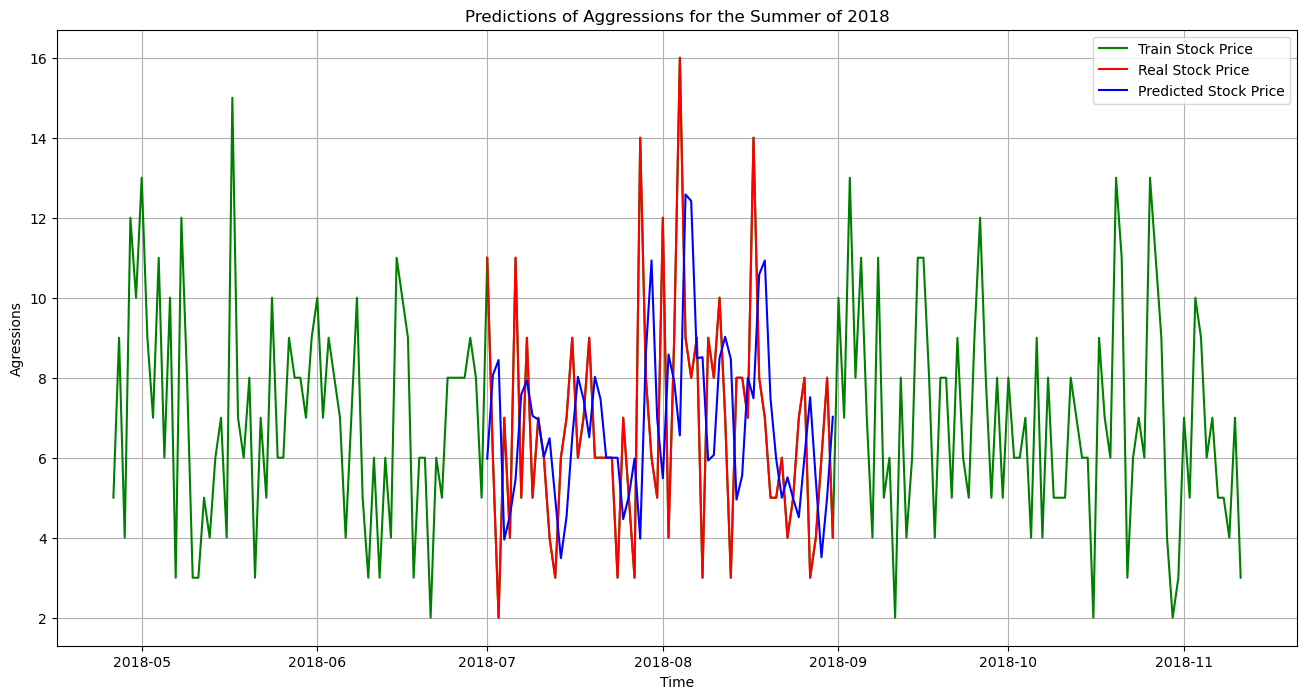

In [10]:
plt.figure(figsize=(16,8))
plt.plot(net_df.index[-200:], net_df['Agressions'].tail(200), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title('Predictions of Aggressions for the Summer of 2018')
plt.xlabel('Time')
plt.ylabel('Agressions')
plt.legend()
plt.grid(True)
plt.savefig('arima_model.pdf')
plt.show()

In [21]:
df_pred = pd.concat([y, pd.Series(predictions, index=y.index[-len(predictions):], name='Predictions')], axis=1)
df_pred = df_pred.iloc[1:]
df_pred

,Agressions,Predictions
Dates,,
2018-07-02,6.0,8.070038
2018-07-03,2.0,8.441873
2018-07-04,7.0,3.953006
2018-07-05,4.0,4.558510
2018-07-06,11.0,5.464926
...,...,...
2018-08-27,3.0,7.511619
2018-08-28,4.0,5.441992
2018-08-29,6.0,3.511629


In [22]:
pred_models = pd.read_csv("../DATASETS/pred_models_verano_2018.csv", index_col="Dates", parse_dates=True)
pred_models

,Agressions,XGBoost
Dates,,
2018-07-02,6.0,6.403933
2018-07-03,2.0,6.031678
2018-07-04,7.0,5.827949
2018-07-05,4.0,5.781966
2018-07-06,11.0,6.452989
...,...,...
2018-08-27,3.0,6.074005
2018-08-28,4.0,6.021876
2018-08-29,6.0,5.941212


In [23]:
pred_models = pred_models.merge(df_pred[['Predictions']], left_index=True, right_index=True, how='left')

In [24]:
pred_models = pred_models.rename(columns={'Predictions':'ARIMA'})

In [25]:
pred_model_deepar = pd.read_csv("../DATASETS/pred_models_verano_2018_deepar.csv", index_col="Dates", parse_dates=True)
pred_model_deepar

,Agressions,Pred
Dates,,
2018-07-02,6,10.35
2018-07-03,2,7.78
2018-07-04,7,7.48
2018-07-05,4,8.16
2018-07-06,11,8.42
...,...,...
2018-08-27,3,6.22
2018-08-28,4,7.56
2018-08-29,6,7.14


In [27]:
pred_models = pred_models.merge(pred_model_deepar[['Pred']], left_index=True, right_index=True, how='left')

In [29]:
pred_models = pred_models.rename(columns={'Pred':'DeepAR'})

In [30]:
pred_models

,Agressions,XGBoost,ARIMA,DeepAR
Dates,,,,
2018-07-02,6.0,6.403933,8.070038,10.35
2018-07-03,2.0,6.031678,8.441873,7.78
2018-07-04,7.0,5.827949,3.953006,7.48
2018-07-05,4.0,5.781966,4.558510,8.16
2018-07-06,11.0,6.452989,5.464926,8.42
...,...,...,...,...
2018-08-27,3.0,6.074005,7.511619,6.22
2018-08-28,4.0,6.021876,5.441992,7.56
2018-08-29,6.0,5.941212,3.511629,7.14


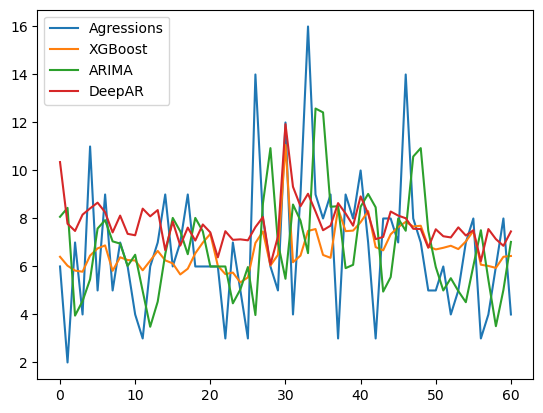

In [31]:
pred_models = pred_models.reset_index()
pred_models.plot(y=["Agressions","XGBoost","ARIMA","DeepAR"])
plt.show()